In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])+10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [ ]:
file = "/content/drive/MyDrive/data.csv"
array = np.genfromtxt(file, delimiter=",")

In [ ]:
array.shape

(155, 12)

In [ ]:
array[11]

array([7.00000000e+00, 1.08576000e+02, 5.33160000e+01, 3.33100000e+00,
       9.79000000e+01, 8.20000000e+01, 2.40000000e+01, 7.90000000e+01,
       5.90000000e+01, 5.48271752e-02, 8.70000000e+01, 9.30000000e+01])

In [ ]:
X_train = array[:,0:11]
Y_train = array[:,11]

In [ ]:
model = Sequential([
    Normalization(axis=-1, input_shape=(11, )),
    Dense(7, activation="relu"),
    Dense(1, activation="linear")
])
model.compile(loss="mean_absolute_error", optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_13 (Normaliz  (None, 11)                23        
 ation)                                                          
                                                                 
 dense_33 (Dense)            (None, 7)                 84        
                                                                 
 dense_34 (Dense)            (None, 1)                 8         
                                                                 
Total params: 115 (464.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_split=0.1)

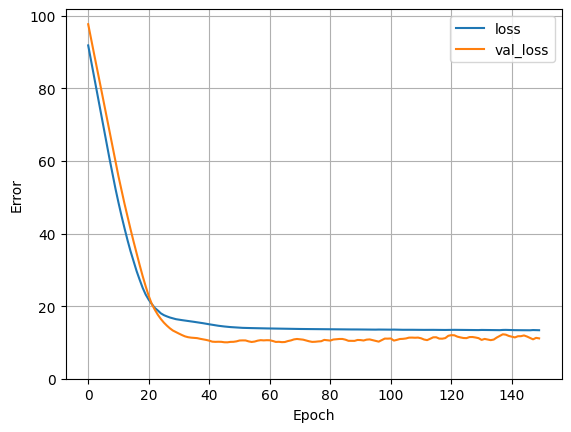

In [ ]:
plot_loss(history)

In [ ]:
i = 120
x_test = X_train[i]
y_test = Y_train[i]
model.predict(x_test), y_test

1/1 [==============================] - 0s 110ms/step


(array([[71.786415]], dtype=float32), 81.0)

5/5 [==============================] - 0s 3ms/step


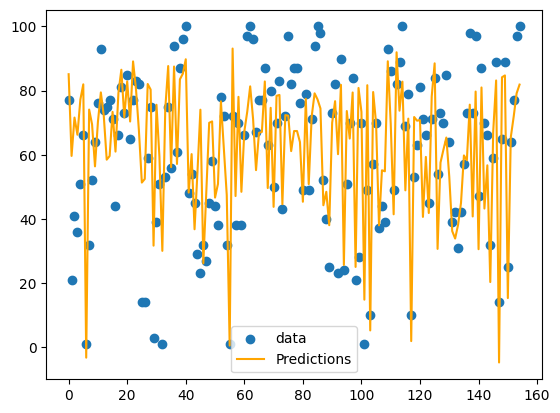

In [ ]:
x = [i for i in range(0, len(Y_train))]
predictions = model.predict(X_train)
plt.scatter(x, Y_train, label="data")
plt.plot(x, predictions, label="Predictions", color="orange")
plt.legend()